In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

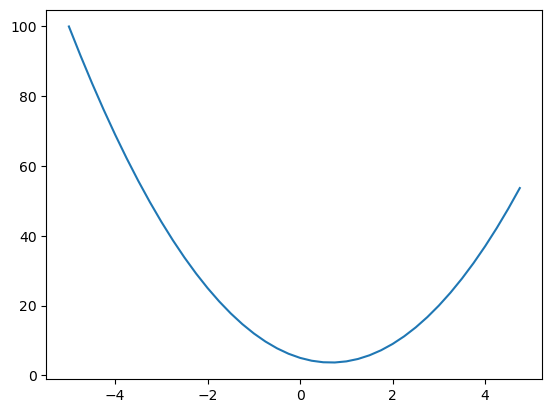

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
h = 0.000001
x = 2/3
f(x+h)

3.6666666666696663

In [6]:
(f(x+h) - f(x))/h # slop of x (derivative)

2.999378523327323e-06

In [7]:
# let get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [8]:
# now lets find derivative of d with respect to 'a'

h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print(f'd1 = {d1},\nd2 = {d2},\nslope = {(d2 - d1)/h}')

d1 = 4.0,
d2 = 3.999699999999999,
slope = -3.000000000010772


In [9]:
# now lets find derivative of d with respect to 'b'

d1 = a*b + c
b += h
d2 = a*b + c

print(f'd1 = {d1},\nd2 = {d2},\nslope = {(d2 - d1)/h}')

d1 = 3.999699999999999,
d2 = 3.99990001,
slope = 2.0001000000124947


In [10]:
# now lets find derivative of d with respect to 'c'

d1 = a*b + c
c += h
d2 = a*b + c

print(f'd1 = {d1},\nd2 = {d2},\nslope = {(d2 - d1)/h}')

d1 = 3.99990001,
d2 = 4.00000001,
slope = 0.9999999999976694


In [11]:
# So lets first build the Value Object
class Value:
    def __init__(self, data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})"

In [12]:
a = Value(2.0)
b = Value(-3.0)

a,b

(Value(data=2.0), Value(data=-3.0))

In [13]:
a+b

# the above expression is going to provide error as it doesn't know how to add values in the Values class

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [14]:
class Value:
    def __init__(self, data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

In [15]:
a = Value(2.0)
b = Value(-3.0)

a + b, a.__add__(b)

(Value(data=-1.0), Value(data=-1.0))

In [16]:
# so now we also have to maintian what value produce what value, for this we are going to create a set
class Value:
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out

In [17]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10)

d1 = a * b + c
d1

Value(data=4.0)

In [18]:
d1._prev

{Value(data=-6.0), Value(data=10)}

In [19]:
class Value:
    def __init__(self, data, _children=(), _op='', _label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._label = _label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

a = Value(2.0, _label='a')
b = Value(-3.0, _label='b')
c = Value(10.0, _label='c')
e = a*b; e._label='e'
d = e + c; d._label='d'
d

Value(data=4.0)

In [20]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [21]:
d._op

'+'

In [22]:
from graphviz import Digraph

def trace(root):
    # so lets build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular {'record'} node for it
        dot.node(name=uid, label="{ %s | data %.4f}" % (n._label, n.data), shape="record")
        if n._op:
            dot.node(name=uid+n._op, label=n._op)
            dot.edge(uid+n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
    
    return dot
            
trace(d)

({Value(data=-3.0),
  Value(data=-6.0),
  Value(data=10.0),
  Value(data=2.0),
  Value(data=4.0)},
 {(Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-6.0), Value(data=4.0)),
  (Value(data=10.0), Value(data=4.0)),
  (Value(data=2.0), Value(data=-6.0))})

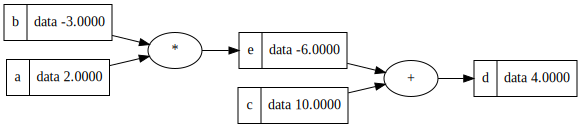

In [23]:
draw_dot(d)

In [24]:
a = Value(2.0, _label='a')
b = Value(-3.0, _label='b')
c = Value(10.0, _label='c')
e = a*b; e._label='e'
d = e + c; d._label='d'

f = Value(-2.0, _label='f')
L = d * f; L._label='L'
L

Value(data=-8.0)

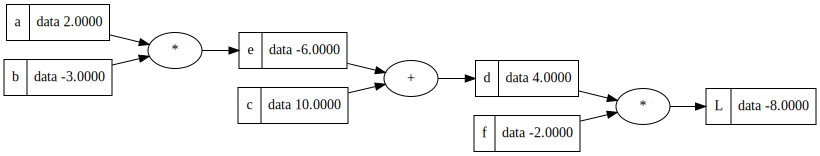

In [25]:
draw_dot(L)

In [26]:
class Value:
    def __init__(self, data, _children=(), _op='', _label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self._label = _label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

a = Value(2.0, _label='a')
b = Value(-3.0, _label='b')
c = Value(10.0, _label='c')
e = a*b; e._label='e'
d = e + c; d._label='d'

f = Value(-2.0, _label='f')
L = d * f; L._label='L'
L

Value(data=-8.0)

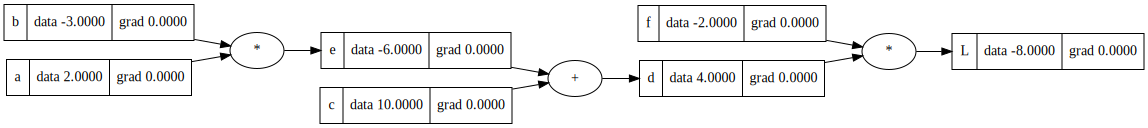

In [27]:
from graphviz import Digraph

def trace(root):
    # so lets build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular {'record'} node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n._label, n.data, n.grad), shape="record")
        if n._op:
            dot.node(name=uid+n._op, label=n._op)
            dot.edge(uid+n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
    
    return dot
            
draw_dot(L)

<pre>
L = d * f

dL/dd = ?

(f(x+h) - f(x))/h
((d+h)*f - d*f)/h
(df + hf - df)/h
hf/h
f

=> dL/dd = f
=> dL/df = d (similarly as above)
=========================================================================
Again now if we want to calculate the derivative of L w.r.t c, 
    we first have to find the derivative of d w.r.t c
    => d = e + c
        (f(x+h) - f(x))/h
        (c+h+e - (e + c)/h
        h/h
        1.0

    => dd/dc = 1.0
    => dd/de = 1.0 (similarly as above)

Using Chain Rule,
=> dL/dc = dL/dd * dd/dc
         = -2.0 * 1.0
         = -2.0
Similarly for L w.r.t e,
    dL/de = dL/dd * dd/de
          = -2.0 * 1.0
          = -2.0
========================================================================
Now derivative of L w.r.t a
    => dL/da = dL/de * de/da
    So lets findout de/da
    => e = a*b
        ((a+h)*b) - a*b)/h
        (ab +bh - ab)/h
        bh/h
        b
    => dL/da = -2.0 * -3.0
            = 6.0
Similarly derivative of L w.r.t b
    => dL/da = dL/de * de/db
             = -2.0 * 2.0
             = -4.0
</pre>

In [28]:
L.grad=1.0
d.grad=-2.0
f.grad=4.0
e.grad=-2.0
c.grad=-2.0
b.grad=-4.0
a.grad=6.0

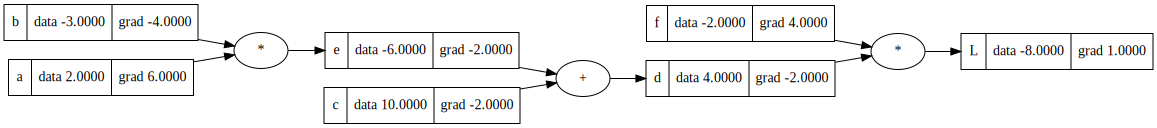

In [29]:
draw_dot(L)

In [30]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f
L

Value(data=-7.286496)

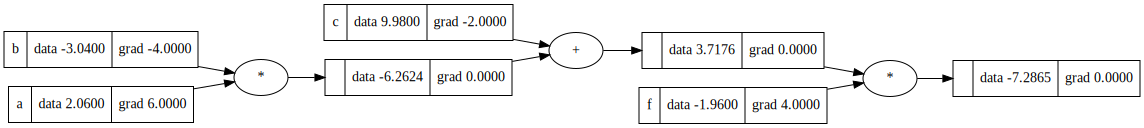

In [31]:
draw_dot(L)

In [32]:
# we can use this for cross check our results
def derivative():
    h = 0.001
    
    a = Value(2.0, _label='a')
    b = Value(-3.0, _label='b')
    c = Value(10.0, _label='c')
    e = a*b; e._label='e'
    d = e + c; d._label='d'
    f = Value(-2.0, _label='f')
    L = d * f; L._label='L'
    L1 = L.data

    a = Value(2.0, _label='a')
    b = Value(-3.0, _label='b')
    c = Value(10.0, _label='c')
    e = a*b; e._label='e'
    d = e + c; d._label='d'
    f = Value(-2.0, _label='f')
    L = d * f; L._label='L'
    L2 = L.data + h 
    return (L2 - L1)/h

derivative() 

1.000000000000334

In [33]:
class Value:
    def __init__(self, data, _children=set(), _op="", _label=""):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __repr__(self):
        return f"Value(data={self.data})"
        
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), _op="+")
        def _backward():
            self.grad += out.grad
            other.grad += out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), _op="*")
        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), _op="tanh")
        
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

In [42]:
a = Value(2.0, _label="a")
b = Value(-3.0, _label="b")
c = Value(10.0, _label="c")

e = a*b; e._label="e"
d = e + c; d._label="d"
d

Value(data=4.0)

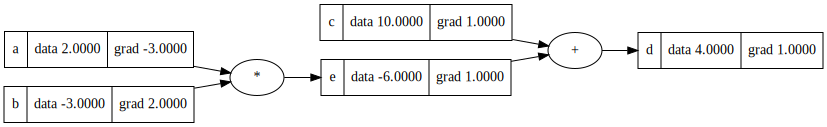

In [45]:
draw_dot(d)

In [44]:
d.grad = 1.0
e.grad = d.grad
c.grad = d.grad

a.grad = d.grad * b.data
b.grad = d.grad * a.data

In [37]:
d.grad = 1.0

In [38]:
d._backward()

In [39]:
c._backward()

In [40]:
e._backward()

## Creating a single neuron structure manulay

In [46]:
x1 = Value(2.0, _label="x1")
w1 = Value(-3.0, _label="w1")
x2 = Value(0.0, _label="x2")
w2 = Value(1.0, _label="w2")
b = Value(6.8813735870195432, _label="b") # the value is for getting the gradient in simple values

x1w1 = w1*x1; x1w1._label="x1*w1"
x2w2 = w2*x2; x2w2._label="x2*w2"
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2._label="x1*w1 + x2*w2"
n = x1w1_x2w2 + b; n._label="n"
o = n.tanh(); o._label="o"
o

Value(data=0.7071067811865476)

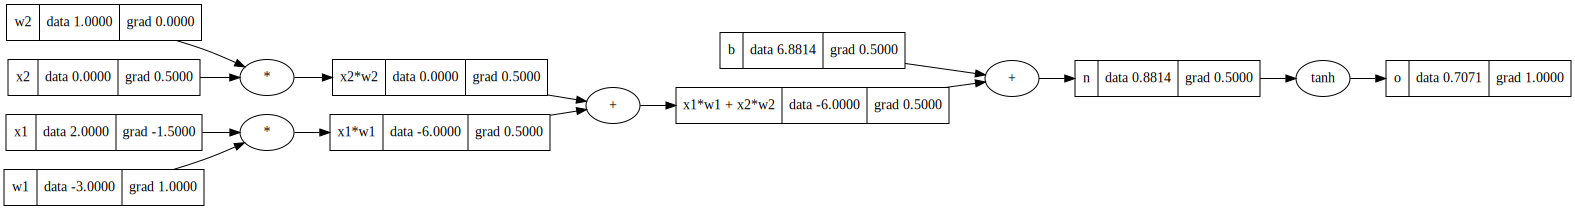

In [54]:
draw_dot(o)

In [48]:
o.grad = 1.0

In [49]:
o._backward()

In [50]:
n._backward()

In [51]:
x1w1_x2w2._backward()

In [52]:
x1w1._backward()

In [53]:
x2w2._backward()

In [55]:
x1 = Value(2.0, _label="x1")
w1 = Value(-3.0, _label="w1")
x2 = Value(0.0, _label="x2")
w2 = Value(1.0, _label="w2")
b = Value(6.8813735870195432, _label="b") # the value is for getting the gradient in simple values

x1w1 = w1*x1; x1w1._label="x1*w1"
x2w2 = w2*x2; x2w2._label="x2*w2"
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2._label="x1*w1 + x2*w2"
n = x1w1_x2w2 + b; n._label="n"
o = n.tanh(); o._label="o"
o

Value(data=0.7071067811865476)

In [56]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

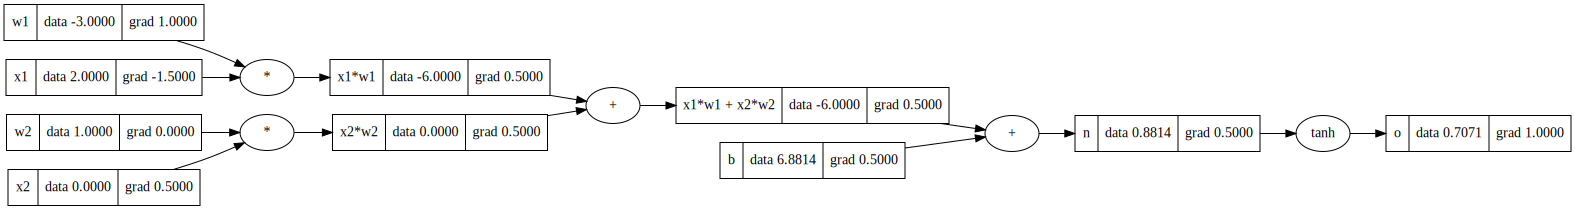

In [57]:
draw_dot(o)

In [58]:
class Value:
    def __init__(self, data, _children=set(), _op="", _label=""):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __repr__(self):
        return f"Value(data={self.data})"
        
    def __add__(self, other):
        other  = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), _op="+")
        
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward
        
        return out
        
    def __mul__(self, other):
        other  = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), _op="*")
        
        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward
        
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "for now only supporting int and float"
        out = Value(self.data ** other, (self, ), _op=f"**{other}")
        
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        
        return out

    def __neg__(self): # -self
        return self * -1
        
    def __sub__(self, other): # self - other
        return self + (-other)

    def __truediv__(self, other): # self/other
        return self * other**-1

    def __rmul__(self, other): # other * self
        return self*other
        
    def __radd__(self, other): # other + self
        return self + other
        
    def __rsub__(self, other): # other - self
        return other + (-self)
        
    def __rtruediv__(self, other): # other / self
        return other * self**-1
        
    def exp(self):
        x = self.data
        out = Value(math.exp(self.data), (self,), _op="exp")

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), _op="tanh")
        
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [59]:
x1 = Value(2.0, _label="x1")
w1 = Value(-3.0, _label="w1")
x2 = Value(0.0, _label="x2")
w2 = Value(1.0, _label="w2")
b = Value(6.8813735870195432, _label="b")

x1w1 = w1*x1; x1w1._label="x1*w1"
x2w2 = w2*x2; x2w2._label="x2*w2"
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2._label="x1*w1 + x2*w2"
n = x1w1_x2w2 + b; n._label="n"
o = n.tanh(); o._label="o"
o

Value(data=0.7071067811865476)

In [60]:
o.backward()

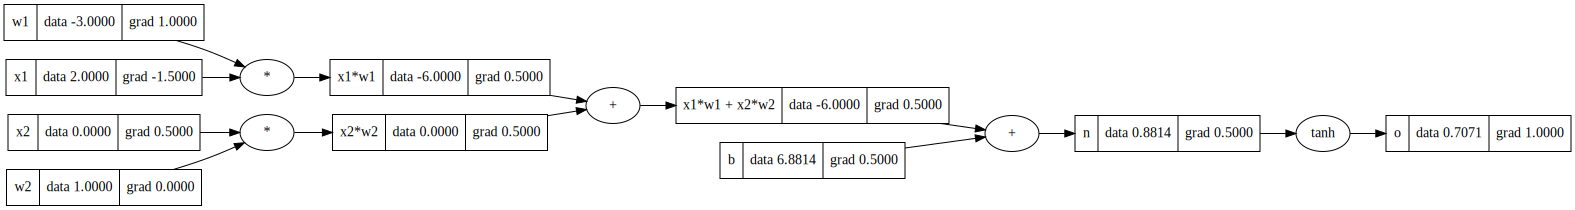

In [61]:
draw_dot(o)

In [62]:
a = Value(2.0)
b = Value(4.0)

c = a/b
c

Value(data=0.5)

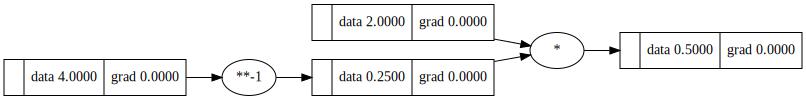

In [63]:
draw_dot(c)

In [64]:
a-b

Value(data=-2.0)

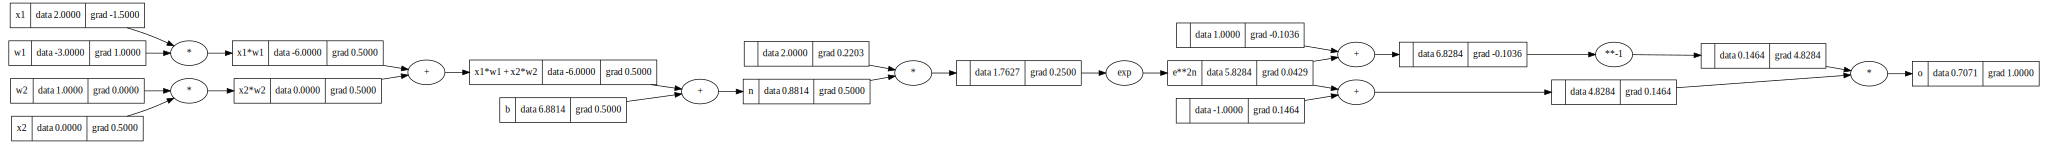

In [66]:
x1 = Value(2.0, _label="x1")
w1 = Value(-3.0, _label="w1")
x2 = Value(0.0, _label="x2")
w2 = Value(1.0, _label="w2")
b = Value(6.8813735870195432, _label="b")

x1w1 = w1*x1; x1w1._label="x1*w1"
x2w2 = w2*x2; x2w2._label="x2*w2"
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2._label="x1*w1 + x2*w2"
n = x1w1_x2w2 + b; n._label="n"
# --------tanh----------
e = (2*n).exp(); e._label="e**2n"
o = (e-1)/(e+1); o._label="o"
# ----------------------
o.backward()
draw_dot(o)

## Now creating the class for the Neuron

In [140]:
import random
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for i in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x): # consturctor
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]
    
class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

## Training the NN manually

In [141]:
x = [2.0, 3.0, 4.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.830103598098443)

In [142]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # desired target

ypred = [n(x) for x in xs]
ypred

[Value(data=0.05847820758227687),
 Value(data=-0.32114445781859596),
 Value(data=0.11547096335697031),
 Value(data=-0.29224103292557985)]

In [143]:
# loss
loss = sum([(yp - y)**2 for yp, y in zip(ypred, ys)])
loss

Value(data=4.261470490016987)

In [284]:
# new loss
ypred = [n(x) for x in xs]
loss = sum([(yp - y)**2 for yp, y in zip(ypred, ys)])
loss

Value(data=4.6836619685233824e-08)

In [278]:
loss.backward()

In [279]:
n.layers[0].neurons[0].w[0].data

-0.6277717893183825

In [280]:
n.layers[0].neurons[0].w[0].grad

1.9849608475077498

In [281]:
for p in n.parameters():
    p.data += -0.1 * p.grad

In [282]:
n.layers[0].neurons[0].w[0].data

-0.8262678740691575

In [283]:
ypred

[Value(data=0.9992569715993208),
 Value(data=-0.9991891645951144),
 Value(data=-0.9994263503733191),
 Value(data=0.9992093408280501)]

In [286]:
n.parameters()

[Value(data=-0.8262678740691575),
 Value(data=-1.0404507889822703),
 Value(data=5.071991717152203),
 Value(data=1.3047283554874411),
 Value(data=1.5685424868736406),
 Value(data=1.2584803154368085),
 Value(data=0.7367330314342289),
 Value(data=2.4677675148021465),
 Value(data=0.03288768426845862),
 Value(data=-0.4092919034594313),
 Value(data=1.5123873053047485),
 Value(data=-0.18155275836783671),
 Value(data=-2.4153014842632823),
 Value(data=-0.8402904033013545),
 Value(data=3.8071552879285253),
 Value(data=-0.3838551979442739),
 Value(data=-0.4665700822080093),
 Value(data=-0.15758629899263588),
 Value(data=0.7661839102372603),
 Value(data=-0.7752557599126105),
 Value(data=1.0960915025592284),
 Value(data=-4.196708966216109),
 Value(data=1.8704917380200876),
 Value(data=-2.6210638911040975),
 Value(data=-0.10459494424591212),
 Value(data=-1.3784260818281162),
 Value(data=-0.12294859234986694),
 Value(data=0.5516165389702818),
 Value(data=0.3572668484824149),
 Value(data=-0.5108629152

## Gradient Descent: Optimizing using a loop

In [308]:
class Value:
    def __init__(self, data, _children=set(), _op="", _label=""):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __repr__(self):
        return f"Value(data={self.data})"
        
    def __add__(self, other):
        other  = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), _op="+")
        
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward
        
        return out
        
    def __mul__(self, other):
        other  = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), _op="*")
        
        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward
        
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "for now only supporting int and float"
        out = Value(self.data ** other, (self, ), _op=f"**{other}")
        
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        
        return out

    def __neg__(self): # -self
        return self * -1
        
    def __sub__(self, other): # self - other
        return self + (-other)

    def __truediv__(self, other): # self/other
        return self * other**-1

    def __rmul__(self, other): # other * self
        return self*other
        
    def __radd__(self, other): # other + self
        return self + other
        
    def __rsub__(self, other): # other - self
        return other + (-self)
        
    def __rtruediv__(self, other): # other / self
        return other * self**-1
        
    def exp(self):
        x = self.data
        out = Value(math.exp(self.data), (self,), _op="exp")

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), _op="tanh")
        
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [309]:
import random
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for i in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x): # consturctor
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]
    
class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [310]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # desired target

In [311]:
n = MLP(3, [4, 4, 1])

In [338]:
for k in range(20):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for yout, ygt in zip(ys, ypred))

    # backword pass
    for p in n.parameters():  # zero grad problem pytourch
        p.grad = 0.0
    loss.backward()

    # update the parameters
    for p in n.parameters():
        p.data += -0.01 * p.grad

    print(k, loss.data)

0 0.025798721769352984
1 0.025692179266590547
2 0.025586480842287183
3 0.025481616649661185
4 0.02537757699325331
5 0.025274352326046922
6 0.02517193324665245
7 0.02507031049655602
8 0.024969474957429544
9 0.02486941764850179
10 0.02477012972398724
11 0.02467160247057335
12 0.02457382730496243
13 0.024476795771468496
14 0.024380499539666856
15 0.024284930402095325
16 0.024190080272005643
17 0.024095941181163743
18 0.024002505277698122
19 0.023909764823994435


In [339]:
ypred

[Value(data=0.931760351142387),
 Value(data=-0.9626287486687116),
 Value(data=-0.8911707530508275),
 Value(data=0.9224584000023612)]